# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[1.1, 2.2, 3.1, 4.2, 5.3],[2, 4, 6, 8, 10]])
y = np.array([2.3, 4.3, 6.3, 7.8, 9.8])

In [3]:
def get_X_matrix(x):
    x = np.array([[1,1,1,1,1],[1.1, 2.2, 3.1, 4.2, 5.3],[2, 4, 6, 8, 10]])
    I = np.ones(5)
    X = x.T
    return X

In [4]:
def parameters_for_ridge(l, x, y):
    y = y[:, np.newaxis]
    theta = np.dot(np.linalg.inv(np.dot(x.T,x) + l**2),x.T).dot(y)
    return theta

[[ 0.68327969]
 [-3.36793263]
 [ 2.68537711]]


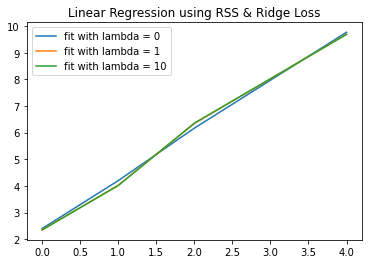

In [6]:
for l in [0, 1, 10]:
    X = get_X_matrix(x)
    theta = parameters_for_ridge(l=l, x=X, y=y)    
    y_hat = X.dot(theta)
    plt.plot(y_hat, label=f"fit with lambda = {l}")
    plt.legend()
print(theta)
plt.title("Linear Regression using RSS & Ridge Loss")
plt.show()

For RSS Loss, Lambda is Zero, which is the best fit for this function.


# Question 3

In [7]:
x =np.array([0,0.2,0.4,0.6,0.8,1, 1.2,1.4])
x = np.exp(x)
y =np.array([5.1,6.4,6.1,8.2,9.5,8.6,12,14.8])
#x= x[:, np.newaxis]
#y= y[:, np.newaxis]

In [8]:
def get_X_matrix(x):
    I = np.ones_like(x)
    X = np.concatenate([I[:, np.newaxis], x[:, np.newaxis]], axis=1)
    return X
def parameters_for_ridge(l, x, y):
    y = y[:, np.newaxis]
    theta = np.linalg.inv(X.T.dot(X) + l ** 2).dot(X.T).dot(y)
    return theta

theta 0 = 2.268
theta 1 = 2.944


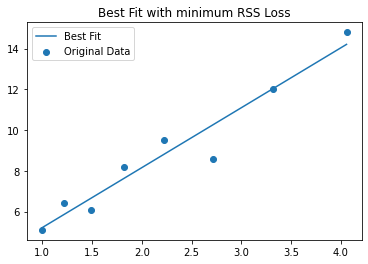

In [9]:
plt.scatter(x, y, label="Original Data")
for l in [0]:
    X = get_X_matrix(x)
    theta = parameters_for_ridge(l=l, x=X, y=y)
    Y_hat = np.matmul(X, theta)
    plt.plot(x, Y_hat, label= "Best Fit")
    plt.legend()
print("theta 0 = %.3f"%theta[0])
print("theta 1 = %.3f"%theta[1])
plt.title("Best Fit with minimum RSS Loss")
plt.show()

# Question 5

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('fivethirtyeight')
np.random.seed(seed=42)

In [11]:
label1 = np.array([[0.2,0.6,2,2.6,3.1,3.8],[3.4,1.8,2,2.7,3.5,1.5]])
label2 = np.array([[-0.7,-2.1,-2.5,-3,-3.9],[-2.9,-2.8,-1.3,-2,-1.5]])

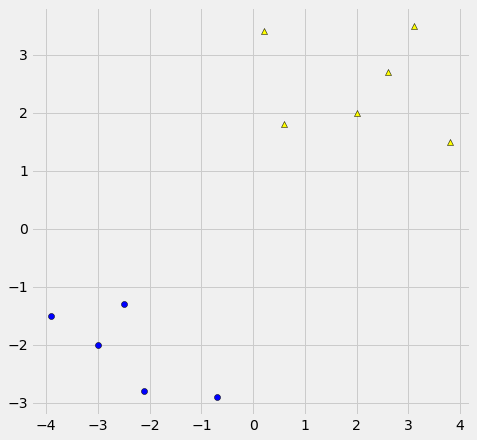

In [12]:
#Plot the data
fig = plt.figure(figsize=(7,7))
ax0 = fig.add_subplot(111)

ax0.scatter(label1[0],label1[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(label2[0],label2[1],marker='o',c='blue',edgecolor='black')

In [13]:
# Calculating the mean vectors
mu0 = np.mean(label1,axis=1).reshape(2,1)
print('mu0 = ',mu0)
mu1 = np.mean(label2,axis=1).reshape(2,1)
print('mu1 = ',mu1)

#Calculating the proportion phi
m = len(label1[0])+len(label2[0])

phi0 = len(label1[0])/m
print('phi0 = ',phi0)

phi1 = len(label2[0])/m
print('phi1 = ',phi1)

mu0 =  [[2.05      ]
 [2.48333333]]
mu1 =  [[-2.44]
 [-2.1 ]]
phi0 =  0.5454545454545454
phi1 =  0.45454545454545453


In [14]:
label1_mu0 = np.dot((label1-mu0),(label1-mu0).T)
label2_mu1 = np.dot((label2-mu1),(label2-mu1).T)

In [15]:
#Calculating Covariance Matrix
sigma = (label1_mu0 + label2_mu1)/2
sigma

array([[ 7.7935    , -1.9125    ],
       [-1.9125    ,  2.86416667]])